In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

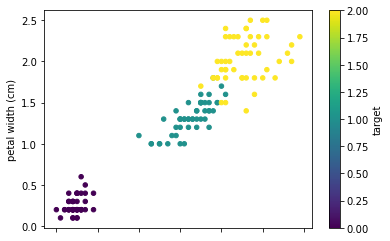

In [2]:
import pandas as pd
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
    x='petal length (cm)',
    y='petal width (cm)',
    c='target',
    colormap='viridis'
)

In [3]:
from sklearn.model_selection import train_test_split
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.linear_model import Perceptron
per_clf_0 = Perceptron()
y_train_0 = (y_train == 0).astype(int)
y_test_0 = (y_test == 0).astype(int)

per_clf_1 = Perceptron()
y_train_1 = (y_train == 1).astype(int)
y_test_1 = (y_test == 1).astype(int)

per_clf_2 = Perceptron()
y_train_2 = (y_train == 2).astype(int)
y_test_2 = (y_test == 2).astype(int)

In [5]:
per_clf_0.fit(X_train, y_train_0)
y_pred_train_0 = per_clf_0.predict(X_train)
y_pred_test_0 = per_clf_0.predict(X_test)

per_clf_1.fit(X_train, y_train_1)
y_pred_train_1 = per_clf_1.predict(X_train)
y_pred_test_1 = per_clf_1.predict(X_test)

per_clf_2.fit(X_train, y_train_2)
y_pred_train_2 = per_clf_2.predict(X_train)
y_pred_test_2 = per_clf_2.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
train_acc_0 = accuracy_score(y_train_0, y_pred_train_0)
test_acc_0 = accuracy_score(y_test_0, y_pred_test_0)

train_acc_1 = accuracy_score(y_train_1, y_pred_train_1)
test_acc_1 = accuracy_score(y_test_1, y_pred_test_1)

train_acc_2 = accuracy_score(y_train_2, y_pred_train_2)
test_acc_2 = accuracy_score(y_test_2, y_pred_test_2)

In [7]:
per_acc = [(train_acc_0, test_acc_0), (train_acc_1, test_acc_1), (train_acc_2, test_acc_2)]
per_acc

[(1.0, 1.0),
 (0.43333333333333335, 0.6),
 (0.9583333333333334, 0.9666666666666667)]

In [8]:
per_wght = []
for perceptron in [per_clf_0, per_clf_1, per_clf_2]:
    w_0 = perceptron.intercept_[0]
    w_1 = perceptron.coef_[0, 0]
    w_2 = perceptron.coef_[0, 1]
    per_wght.append((w_0, w_1, w_2))

In [9]:
per_wght

[(3.0, -1.1000000000000008, -1.3),
 (-10.0, 10.399999999999991, -17.899999999999952),
 (-61.0, 1.5999999999999952, 32.199999999999996)]

In [10]:
import pickle
with open('per_acc.pkl', 'wb') as fp:
    pickle.dump(per_acc, fp)
with open('per_wght.pkl', 'wb') as fp:
    pickle.dump(per_wght, fp)

In [11]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [12]:
import keras
import tensorflow as tf
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, activation="tanh", use_bias=True, input_dim=2))
model.add(keras.layers.Dense(1, activation="sigmoid", use_bias=True))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",
optimizer="sgd")

In [15]:
history = model.fit(X, y, epochs=100, verbose=False)
print(history.history['loss'])

[0.6829279661178589, 0.6826632618904114, 0.6824003458023071, 0.6821392774581909, 0.6818798184394836, 0.6816221475601196, 0.6813663244247437, 0.6811119914054871, 0.6808594465255737, 0.6806085705757141, 0.6803593635559082, 0.6801117658615112, 0.679865837097168, 0.6796215772628784, 0.679378867149353, 0.6791378259658813, 0.678898274898529, 0.6786603331565857, 0.6784240007400513, 0.6781891584396362, 0.6779558658599854, 0.6777241230010986, 0.6774938702583313, 0.6772651076316833, 0.6770378947257996, 0.6768120527267456, 0.6765878200531006, 0.6763648986816406, 0.6761435270309448, 0.6759234666824341, 0.6757049560546875, 0.675487756729126, 0.6752720475196838, 0.6750577092170715, 0.6748446822166443, 0.6746330857276917, 0.6744228005409241, 0.6742138862609863, 0.6740062236785889, 0.673799991607666, 0.6735950708389282, 0.6733914017677307, 0.6731890439987183, 0.6729879379272461, 0.672788143157959, 0.6725895404815674, 0.6723922491073608, 0.6721962690353394, 0.6720013618469238, 0.6718078255653381, 0.671

In [16]:
model.predict(X)

array([[0.45868444],
       [0.62352264],
       [0.64777106],
       [0.6779514 ]], dtype=float32)

In [17]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(2, activation="tanh", use_bias=True, input_dim=2))
model2.add(keras.layers.Dense(1, activation="sigmoid"))
model2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))
history = model2.fit(X, y, epochs=100, verbose=False)

In [18]:
model2.predict(X)

array([[0.33349913],
       [0.89714193],
       [0.38888445],
       [0.30578515]], dtype=float32)

In [19]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(2, activation="tanh", use_bias=True, input_dim=2))
model3.add(keras.layers.Dense(1, activation="sigmoid"))
model3.compile(loss='mean_squared_error',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), metrics=['binary_accuracy'])
history = model3.fit(X, y, epochs=100, verbose=False)

In [20]:
model3.predict(X)

array([[0.04454085],
       [0.9359033 ],
       [0.9426713 ],
       [0.04480869]], dtype=float32)

In [25]:
found = False
while not found:
    model4 = keras.models.Sequential()
    model4.add(keras.layers.Dense(2, activation="tanh", input_dim=2))
    model4.add(keras.layers.Dense(1, activation="sigmoid"))
    model4.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=["accuracy"])
    history = model4.fit(X, y, epochs=100, verbose=False)
    results = model4.predict(X)
    if results[0]<0.1 and results[1]>0.9 and results[2]>0.9 and results[0]<0.1:
        found = True

In [26]:
results

array([[0.00533327],
       [0.9892911 ],
       [0.9902787 ],
       [0.00446132]], dtype=float32)

In [27]:
weights=model4.get_weights()
weights

[array([[-4.0364437,  3.8600276],
        [ 4.721903 , -3.8612096]], dtype=float32),
 array([1.8706245, 1.8734791], dtype=float32),
 array([[-5.23543  ],
        [-5.2147465]], dtype=float32),
 array([4.738738], dtype=float32)]

In [24]:
with open('mlp_xor_weights.pkl', 'wb') as fp:
    pickle.dump(weights, fp)